___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import Essential Libraries

In [527]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

# Read the Dataset

In [528]:
df = pd.read_csv("heart.csv")

In [529]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


# EDA

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [531]:
df.shape

(303, 14)

In [532]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [533]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

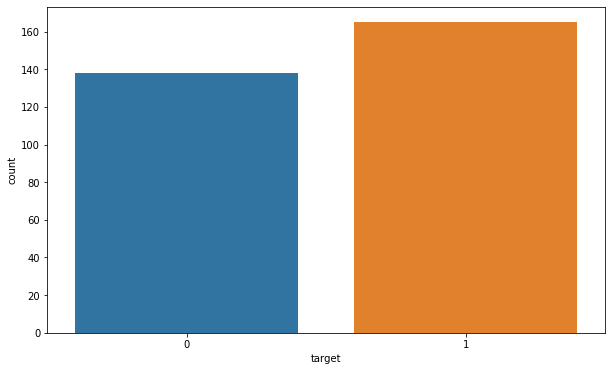

In [534]:
sns.countplot(df.target);

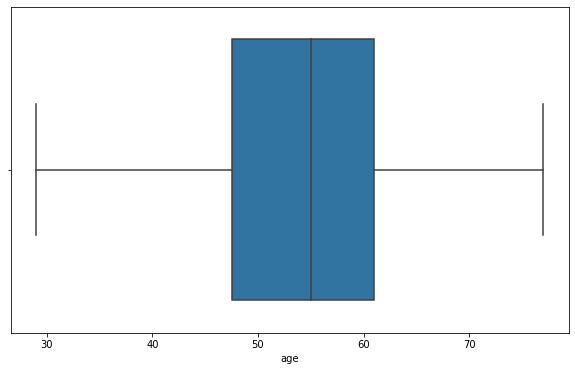

In [535]:
sns.boxplot(df.age);

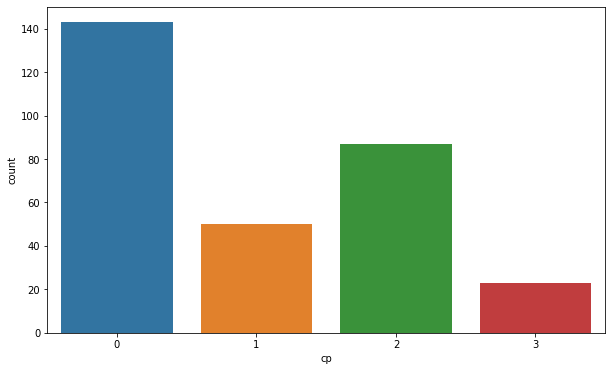

In [536]:
sns.countplot(df.cp);

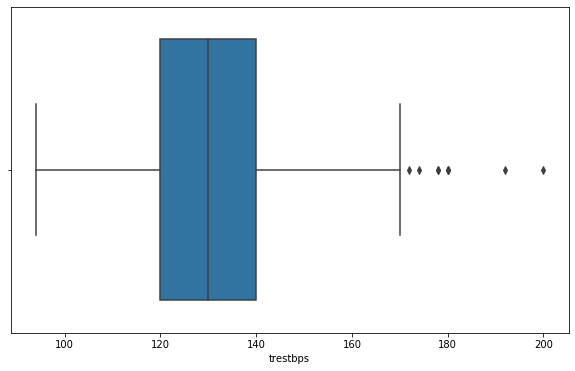

In [537]:
sns.boxplot(df.trestbps);

In [538]:
# 200 is very high for resting blood pressure, but this is a possible case, 
# therefore I didn't consider these six cases as outliers

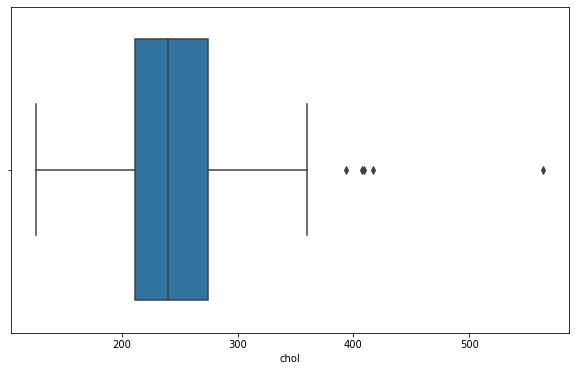

In [539]:
sns.boxplot(df.chol);

In [540]:
# Cholesterol level higher than 400 is called severe hypercholesterolemia. This can range from 400 to 732. 
# So, I will not consider these severe cases as outliers.

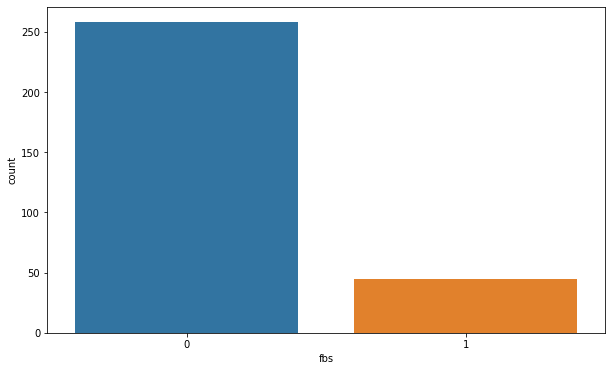

In [541]:
sns.countplot(df.fbs);

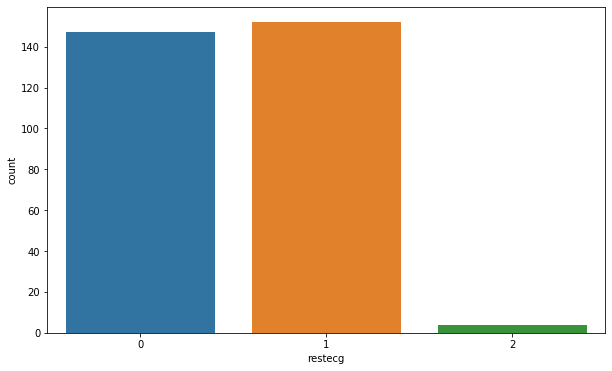

In [542]:
sns.countplot(df.restecg);

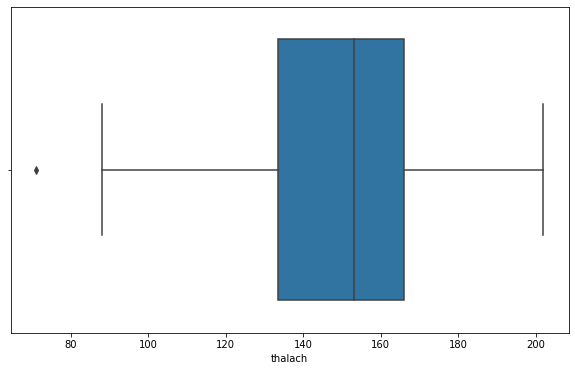

In [543]:
sns.boxplot(df.thalach);

In [544]:
# Heart rate can even be around 60, so I will not consider this case as an outlier.

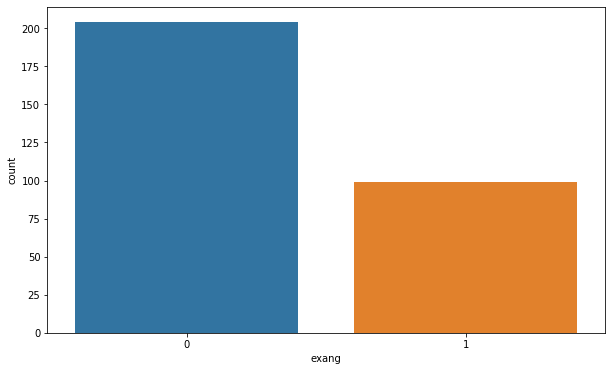

In [545]:
sns.countplot(df.exang);

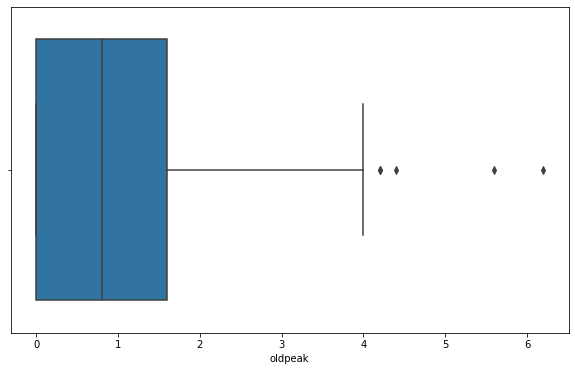

In [546]:
sns.boxplot(df.oldpeak);

In [547]:
# I couldn't find reliable information regarding these severe cases.

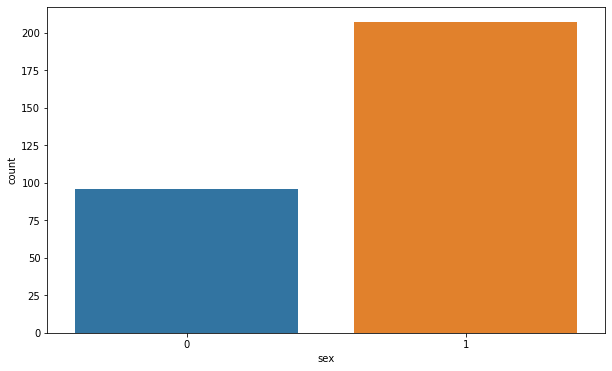

In [548]:
sns.countplot(df.sex);

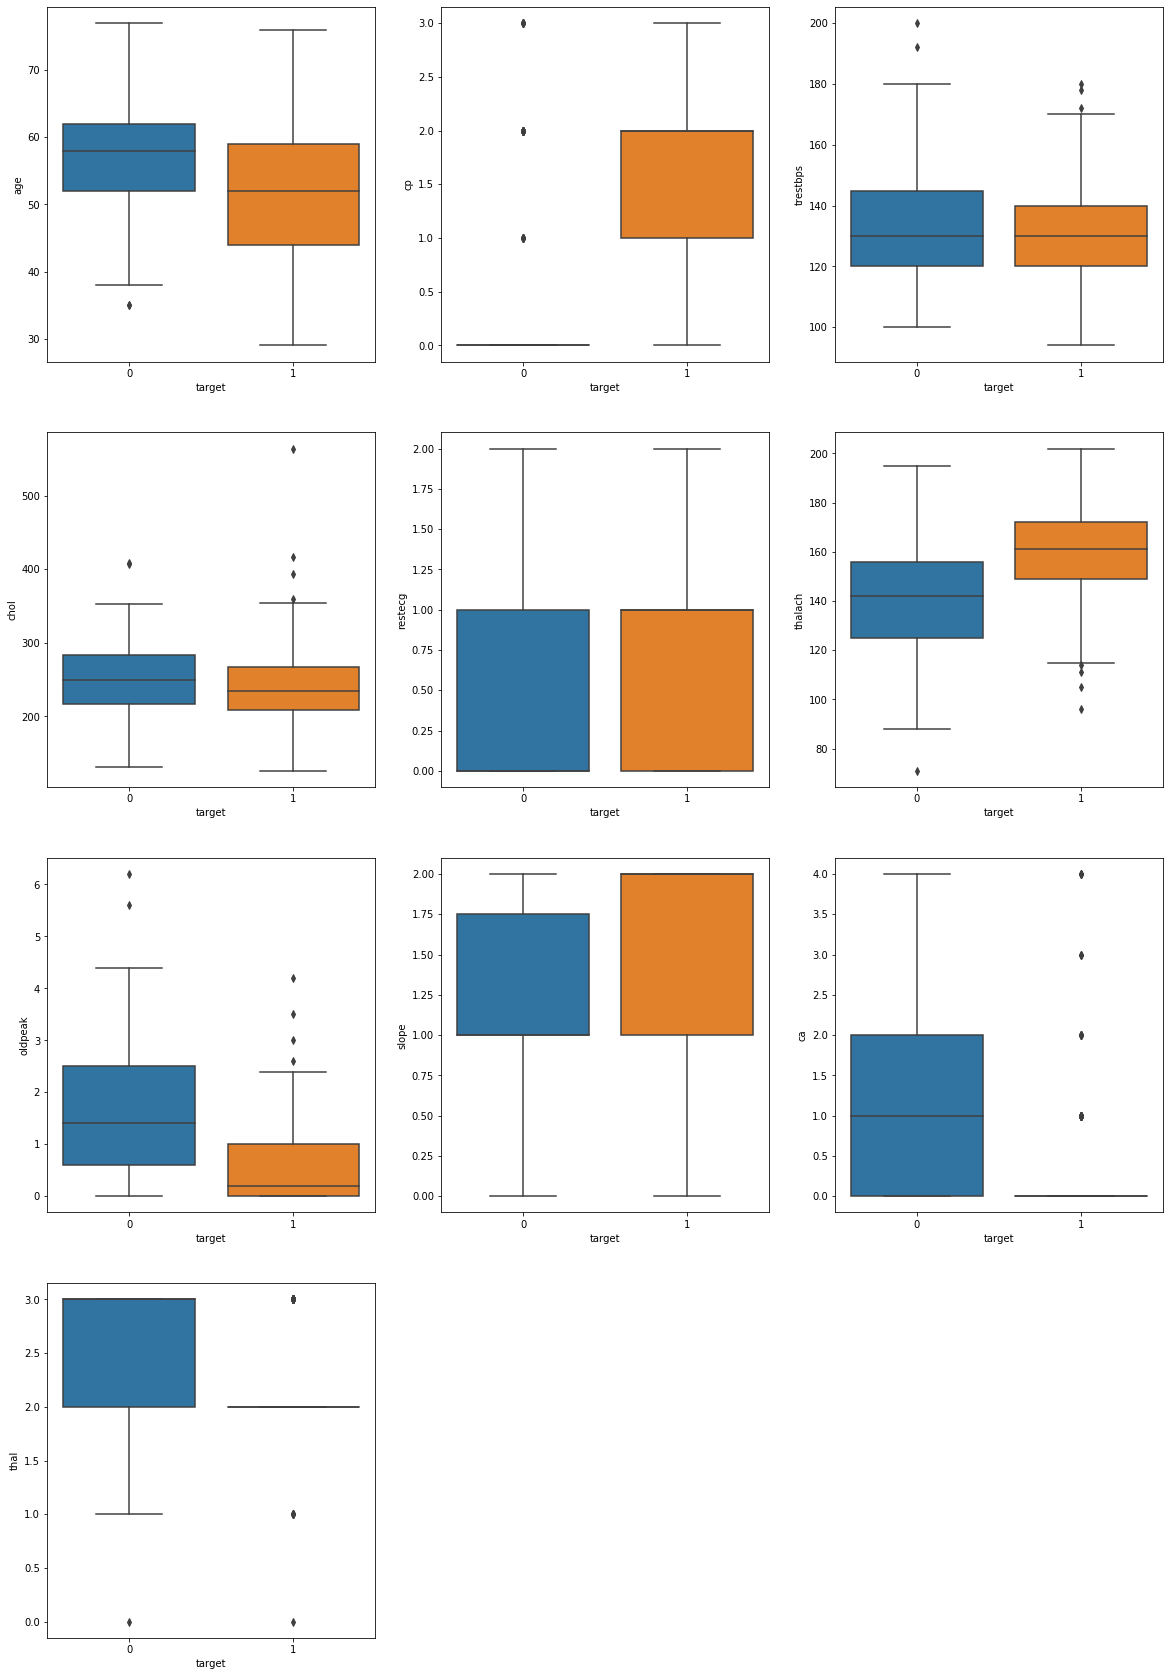

In [549]:
index = 0
plt.figure(figsize=(20,30))
for feature in ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']:
    if feature != "target":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='target',y=feature,data=df)

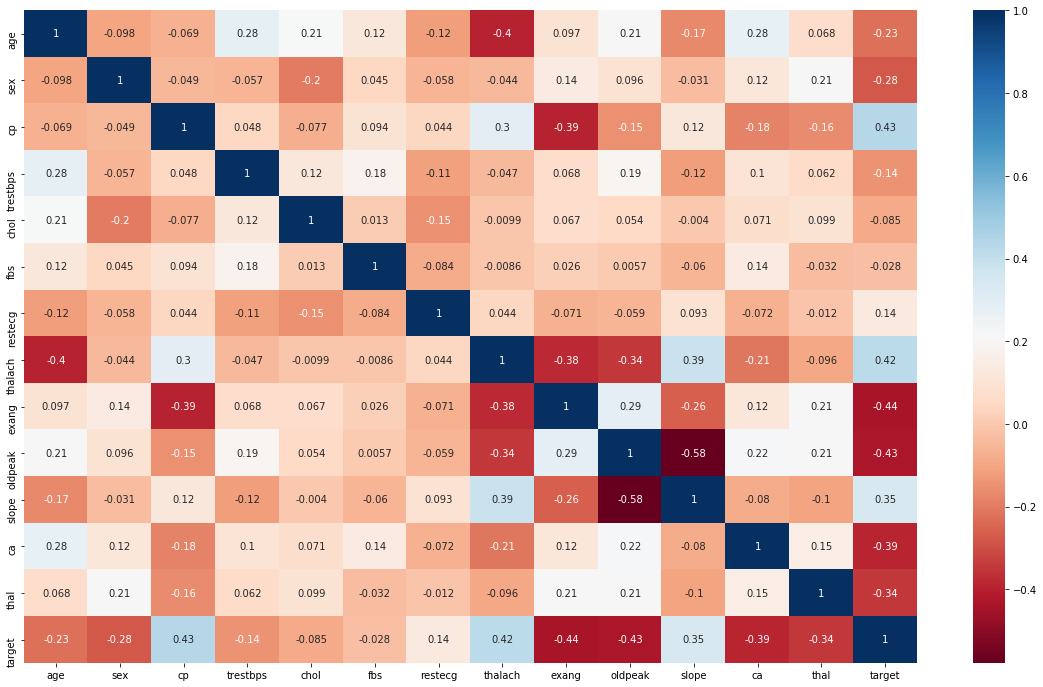

In [550]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='RdBu');

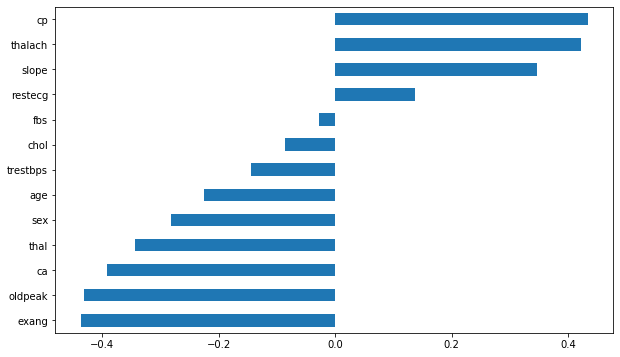

In [551]:
df.corr()["target"].drop("target").sort_values().plot.barh();

# Data Preprocessing

In [552]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [553]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [555]:
scaler = StandardScaler()

In [556]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1 - Implement Logistic Regression and Evaluate

In [557]:
from sklearn.linear_model import LogisticRegression

In [558]:
log_model=LogisticRegression()

In [559]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [560]:
y_pred=log_model.predict(X_test_scaled)

In [561]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [562]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
297,59,1,0,164,176,1,0,90,0,1.000,1,2,1,0,0,0.125
185,44,1,0,112,290,0,0,153,0,0.000,2,1,2,0,0,0.443
194,60,1,2,140,185,0,0,155,0,3.000,1,0,2,0,1,0.722
28,65,0,2,140,417,1,0,157,0,0.800,2,1,2,1,1,0.765
302,57,0,1,130,236,0,0,174,0,0.000,1,1,2,0,1,0.930
133,41,1,1,110,235,0,1,153,0,0.000,2,0,2,1,1,0.903
95,53,1,0,142,226,0,0,111,1,0.000,2,0,3,1,0,0.077
41,48,1,1,130,245,0,0,180,0,0.200,1,0,2,1,1,0.823
252,62,0,0,138,294,1,1,106,0,1.900,1,3,2,0,0,0.082
43,53,0,0,130,264,0,0,143,0,0.400,1,0,2,1,1,0.722


### Model Performance on Classification Tasks

In [563]:
from sklearn.metrics import confusion_matrix, classification_report

In [564]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [565]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[19  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set
[[ 85  25]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.83      0.90      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



### Cross Validation

In [566]:
from sklearn.model_selection import cross_validate

In [567]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.004,0.003,0.800,0.857,0.828,0.800
2,0.003,0.002,0.706,0.857,0.774,0.720
3,0.003,0.002,0.786,0.846,0.815,0.792
4,0.003,0.002,0.800,0.923,0.857,0.833
5,0.003,0.002,0.917,0.846,0.880,0.875
6,0.002,0.003,0.733,0.846,0.786,0.750
7,0.003,0.002,0.857,0.923,0.889,0.875
8,0.003,0.002,0.917,0.846,0.880,0.875
9,0.002,0.003,0.917,0.846,0.880,0.875
10,0.003,0.002,0.800,0.923,0.857,0.833


In [568]:
df_scores.mean()[2:]

test_precision   0.823
test_recall      0.871
test_f1          0.845
test_accuracy    0.823
dtype: float64

Even though our test scores are a little bit lower than the training scores, cross validation shows that there is no problem with the model. Also, since our target label is not so unbalanced, we can use the accuracy score as the referencing value.

### GridSearchCV

In [569]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [570]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",
                          n_jobs = -1)

In [571]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06...
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                

In [572]:
grid_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

In [573]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[18 10]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61


Train_Set
[[ 86  24]
 [ 11 121]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       110
           1       0.83      0.92      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242



### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [574]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

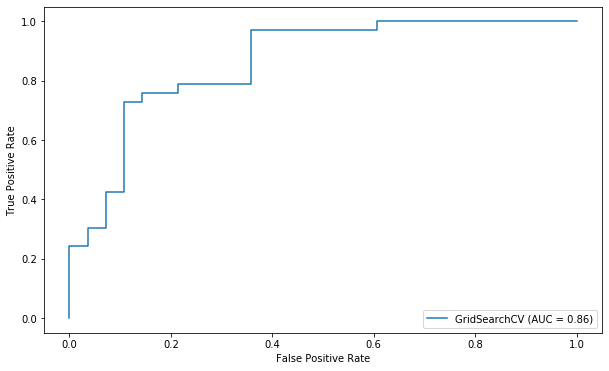

In [575]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

In [577]:
y_pred_proba = grid_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8625541125541125

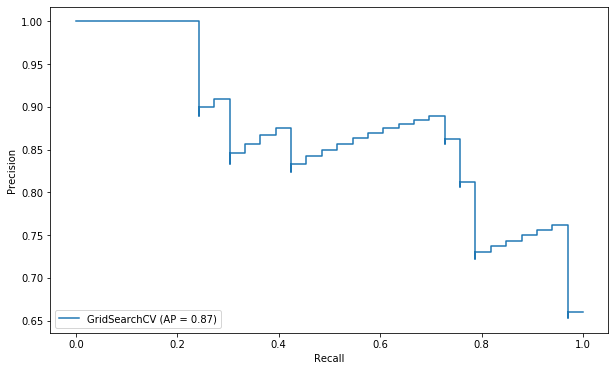

In [578]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

### Finding the Best Threshold for the Maximum Recall Score

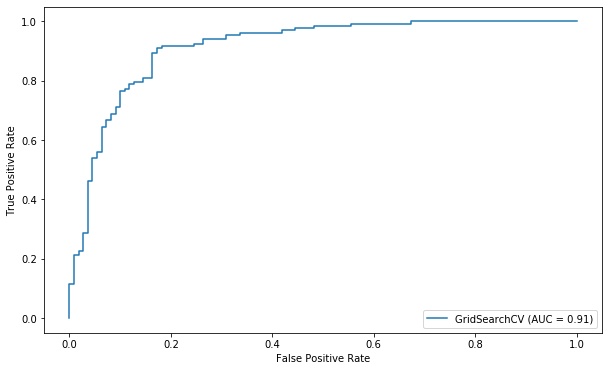

In [593]:
plot_roc_curve(grid_model, X_train_scaled, y_train);

In [588]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9139807162534436

In [589]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [590]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5551365501390927

In [591]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [592]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[18 10]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.74      0.88      0.81        33

    accuracy                           0.77        61
   macro avg       0.78      0.76      0.76        61
weighted avg       0.78      0.77      0.77        61



In [585]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [586]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [587]:
model = LogisticRegression(C= 0.1, class_weight= None,penalty= 'l1',solver= 'saga')
CV(10, model, pd.DataFrame(X_train_scaled), y_train, 0.5)

Accuracy      84.30%  std 9.76%
Precision-1   83.05%  std 10.50%
Recall-1      90.82%  std 8.98%
F1_score-1    86.45%  std 8.34%


I calculated the optimal threshold for both the logistic model and the grid model. But in both of these cases, the scores went down. So, I decided to use 0.5 as the threshold which gives me the above scores using the optimal parameters that I found through the GridSearch.

# 2 - Implement KNN and Evaluate

In [594]:
from sklearn.neighbors import KNeighborsClassifier

In [595]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [596]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [597]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [598]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [599]:
pd.DataFrame(y_pred_proba)

,0,1
0,1.000,0.000
1,0.400,0.600
2,1.000,0.000
3,0.600,0.400
4,0.400,0.600
...,...,...
56,0.400,0.600
57,0.400,0.600
58,1.000,0.000
59,0.800,0.200


In [600]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [601]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
252,0,0,0.200,0.800
51,1,0,0.400,0.600
272,0,0,0.200,0.800
264,0,0,0.000,1.000
236,0,0,0.400,0.600
107,1,1,0.800,0.200
65,1,1,1.000,0.000
61,1,1,0.600,0.400
271,0,0,0.400,0.600
240,0,0,0.000,1.000


### Model Performance on Classification Tests

In [602]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [603]:
confusion_matrix(y_test, y_pred)

array([[19,  9],
       [ 3, 30]], dtype=int64)

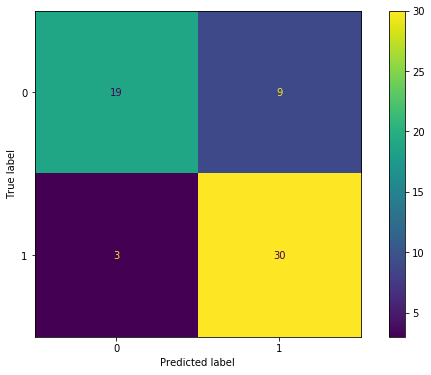

In [604]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [605]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



### Elbow Method for Choosing Reasonable K Values

In [606]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [607]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

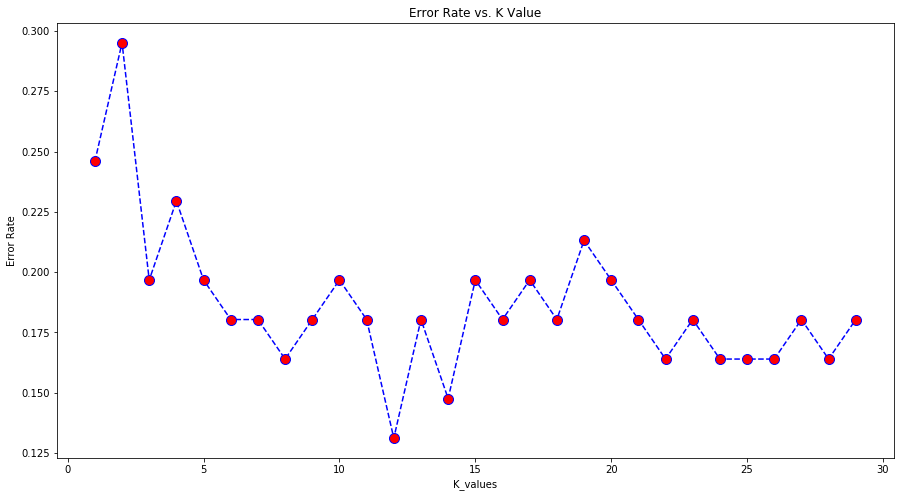

In [608]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate');
# plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
# plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

In [609]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [610]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train_scaled,y_train)
print('WITH K=12\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=12

Test_Set

[[22  6]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61


Train_Set

[[ 91  19]
 [ 16 116]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       110
           1       0.86      0.88      0.87       132

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



### Cross Validate for Optimal K

In [611]:
from sklearn.model_selection import cross_val_score, cross_validate

In [612]:
model = KNeighborsClassifier(n_neighbors=12)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002,0.006,0.920,0.929,0.929,0.929
2,0.001,0.004,0.640,0.647,0.786,0.710
3,0.001,0.003,0.750,0.733,0.846,0.786
4,0.001,0.003,0.875,0.812,1.000,0.897
5,0.000,0.004,0.875,1.000,0.769,0.870
6,0.001,0.003,0.750,0.733,0.846,0.786
7,0.000,0.004,0.917,0.923,0.923,0.923
8,0.001,0.004,0.875,0.917,0.846,0.880
9,0.001,0.004,0.875,0.917,0.846,0.880
10,0.001,0.004,0.792,0.786,0.846,0.815


In [613]:
df_scores.mean()[2:]

test_accuracy    0.827
test_precision   0.840
test_recall      0.864
test_f1          0.847
dtype: float64

### Gridsearch Method for Choosing Reasonable K Values

In [614]:
from sklearn.model_selection import GridSearchCV

In [615]:
knn_grid = KNeighborsClassifier()

In [616]:
k_values= range(1,30)

In [617]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [618]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [619]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [620]:
knn_grid_model.best_params_

{'n_neighbors': 26, 'p': 1, 'weights': 'distance'}

In [621]:
print('WITH K=26\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=26

Test_Set

[[18 10]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61


Train_Set

[[110   0]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



The optimal values found by the GridSeach is perfect in the training set, but not good in the test set. There is overfitting here. So, I will continue with the K value that I found through the elbow method.

### Evaluating ROC Curves and AUC

In [622]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [623]:
knn_model = KNeighborsClassifier(n_neighbors=12).fit(X_train_scaled, y_train)

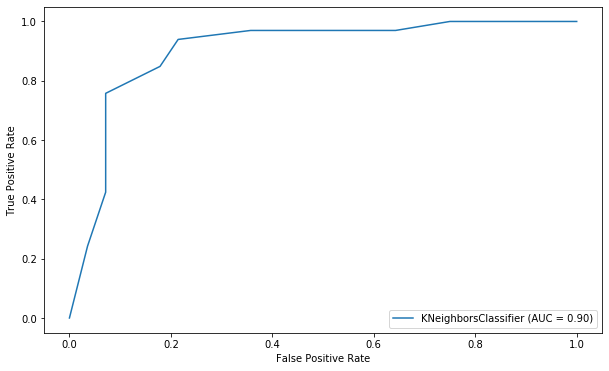

In [624]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

In [626]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9031385281385281

# Visually compare models based on your chosen metric

### Logistic Regression with parameters found in the GridSearch and 0.5 as the optimal threshold

In [504]:
model = LogisticRegression(C= 0.1, class_weight= None,penalty= 'l1',solver= 'saga')
CV(10, model, pd.DataFrame(X_train_scaled), y_train, 0.5)

Accuracy      84.30%  std 9.76%
Precision-1   83.05%  std 10.50%
Recall-1      90.82%  std 8.98%
F1_score-1    86.45%  std 8.34%


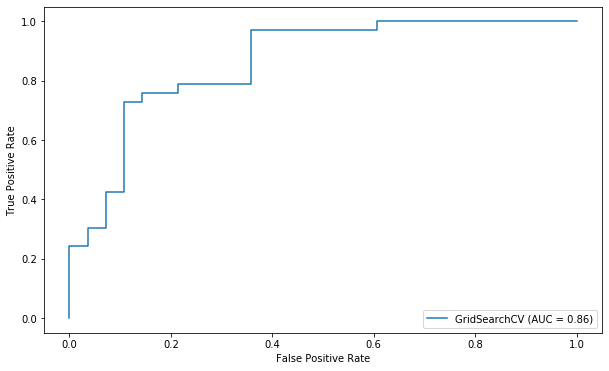

In [576]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

### KNN with k=12

In [505]:
model = KNeighborsClassifier(n_neighbors=12)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.827
test_precision   0.840
test_recall      0.864
test_f1          0.847
dtype: float64

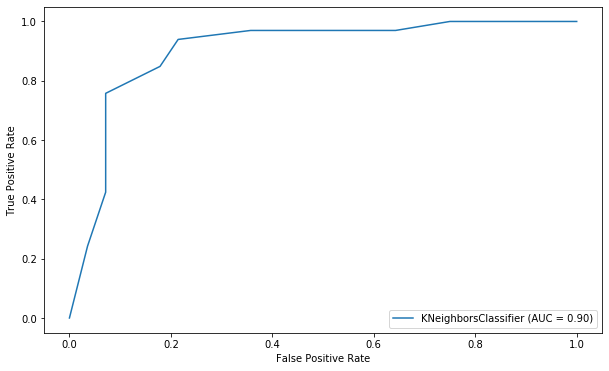

In [625]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

I choose to continue with logistic regression.

# Choose the best model and make a random prediction 

In [627]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [628]:
scaler = StandardScaler()

In [629]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [630]:
X_scaled = scaler.transform(X)

### For Logistic Regression

In [631]:
final_log_model =  LogisticRegression(C= 0.1, class_weight= None,penalty= 'l1',solver= 'saga')

In [632]:
new_obs = {"age": [33, 50, 46, 65, 29],
           "sex": [1, 0, 1, 1, 0],
           "cp": [0, 3, 2, 1, 3],
           "trestbps": [100, 120, 140, 180, 150],
           "chol": [130, 200, 180, 300, 400],
           "fbs": [1, 1, 0, 0, 0],
           "restecg": [0, 2, 2, 1, 1],
           "thalach": [78, 202, 200, 190, 100],
           "exang": [0, 1, 1, 0, 0],
           "oldpeak": [0, 1.1, 5.2, 2.1, 0.5],
           "slope": [0, 1, 2, 1, 2],
           "ca": [0, 1, 1, 2, 4],
           "thal": [0, 1, 2, 3, 3]
          }

In [633]:
samples = pd.DataFrame(new_obs)
samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,33,1,0,100,130,1,0,78,0,0.000,0,0,0
1,50,0,3,120,200,1,2,202,1,1.100,1,1,1
2,46,1,2,140,180,0,2,200,1,5.200,2,1,2
3,65,1,1,180,300,0,1,190,0,2.100,1,2,3
4,29,0,3,150,400,0,1,100,0,0.500,2,4,3


In [634]:
samples_scaled = scaler.transform(samples)
samples_scaled

array([[-2.3564682 ,  0.68100522, -0.93851463, -1.80612489, -2.24685838,
         2.394438  , -1.00583187, -3.13315357, -0.69663055, -0.89686172,
        -2.27457861, -0.71442887, -3.78482354],
       [-0.48155814, -1.46841752,  1.97312292, -0.66386682, -0.89407462,
         2.394438  ,  2.80375634,  2.28942904,  1.43548113,  0.05210339,
        -0.64911323,  0.26508221, -2.14887271],
       [-0.92271345,  0.68100522,  1.00257707,  0.47839125, -1.28058427,
        -0.41763453,  2.80375634,  2.20196803,  1.43548113,  3.58915517,
         0.97635214,  0.26508221, -0.51292188],
       [ 1.17277425,  0.68100522,  0.03203122,  2.7629074 ,  1.03847361,
        -0.41763453,  0.89896224,  1.76466298, -0.69663055,  0.91479895,
        -0.64911323,  1.24459328,  1.12302895],
       [-2.7976235 , -1.46841752,  1.97312292,  1.04952029,  2.97102184,
        -0.41763453,  0.89896224, -2.17108246, -0.69663055, -0.46551394,
         0.97635214,  3.20361543,  1.12302895]])

In [635]:
final_log_model.fit(X_scaled,y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [636]:
predictions = final_log_model.predict(samples_scaled)
predictions_proba = final_log_model.predict_proba(samples_scaled)

In [638]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

# predictions are according to 0.5 threshold

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred,pred_proba_1,pred_proba_0
0,33,1,0,100,130,1,0,78,0,0.000,0,0,0,1,0.594,0.406
1,50,0,3,120,200,1,2,202,1,1.100,1,1,1,1,0.932,0.068
2,46,1,2,140,180,0,2,200,1,5.200,2,1,2,0,0.347,0.653
3,65,1,1,180,300,0,1,190,0,2.100,1,2,3,0,0.287,0.713
4,29,0,3,150,400,0,1,100,0,0.500,2,4,3,0,0.423,0.577


### For KNN

In [639]:
final_knn_model = KNeighborsClassifier(n_neighbors=12)

In [640]:
final_knn_model.fit(X_scaled,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [641]:
predictions = final_knn_model.predict(samples_scaled)
predictions_proba = final_knn_model.predict_proba(samples_scaled)

In [642]:
samples["pred_KNN"] = predictions
samples["pred_proba_1_KNN"] = predictions_proba[:,1]
samples["pred_proba_0_KNN"] = predictions_proba[:,0]
samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred,pred_proba_1,pred_proba_0,pred_KNN,pred_proba_1_KNN,pred_proba_0_KNN
0,33,1,0,100,130,1,0,78,0,0.000,0,0,0,1,0.594,0.406,0,0.417,0.583
1,50,0,3,120,200,1,2,202,1,1.100,1,1,1,1,0.932,0.068,1,0.833,0.167
2,46,1,2,140,180,0,2,200,1,5.200,2,1,2,0,0.347,0.653,1,0.583,0.417
3,65,1,1,180,300,0,1,190,0,2.100,1,2,3,0,0.287,0.713,0,0.333,0.667
4,29,0,3,150,400,0,1,100,0,0.500,2,4,3,0,0.423,0.577,1,0.667,0.333


In [643]:
# According to these five random cases, these two models do not provide similar predictions.